In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date_parser_fn = lambda dates: pd.datetime.strptime(dates,'%Y-%m')

C:\Users\vadi_\AppData\Local\Temp/ipykernel_13044/672487314.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser_fn = lambda dates: pd.datetime.strptime(dates,'%Y-%m')


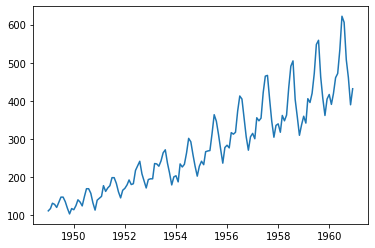

In [18]:
data = pd.read_csv("./data/AirPassengers.csv", parse_dates =['Month'], index_col = 'Month', date_parser = date_parser_fn)
plt.plot(data)
plt.show()

In [39]:
indian_gdp_data = pd.read_csv('./data/GDPIndia.csv', header=0)
date_range = pd.date_range(start='1/1/1960', end='31/12/2017',freq='A')
indian_gdp_data ['TimeIndex'] = pd.DataFrame(date_range,columns=['Year'])
indian_gdp_data.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.284764,84.426437,88.914919,100.048592,114.315161
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


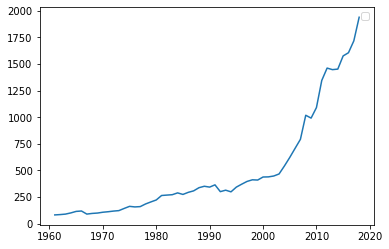

In [40]:
plt.plot(indian_gdp_data.TimeIndex, indian_gdp_data.GDPpercapita)
plt.legend(loc='best')
plt.show()

In [41]:
import pickle
with open('gdp_india.obj', 'wb') as fp:
     pickle.dump(IndiaGDP, fp)
### Retrieve the pickle object
with open('./data/gdp_india.obj', 'rb') as fp:
    indian_gdp_data1 = pickle.load(fp)
indian_gdp_data1.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.284764,84.426437,88.914919,100.048592,114.315161
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


In [48]:
### Saving the TS object as csv
data.to_csv('./data/ts_data.csv', index = True, sep = ',')
### Check the obj stored
data1 = pd.read_csv('./data/ts_data.csv')
### Check
data1.head(2)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118


In [50]:
data = pd.read_csv('./data/daily-min-temperatures.csv',
header = 0, index_col = 0, parse_dates = True, squeeze = True)
print(data.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


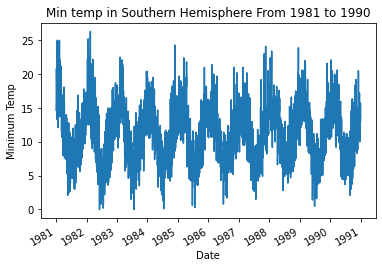

In [51]:
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere From 1981 to 1990')
plt.show()

In [55]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [57]:
data1 = pd.read_csv('./data/raw.csv', parse_dates = [['year','month', 'day', 'hour']],index_col=0, date_parser=parse)

In [58]:
data1.drop('No', axis=1, inplace=True)

In [61]:
data1.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
data1.index.name = 'date'

In [62]:
data1['pollution'].fillna(0, inplace=True)

In [63]:
data1 = data1[24:]

In [64]:
print(data1.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


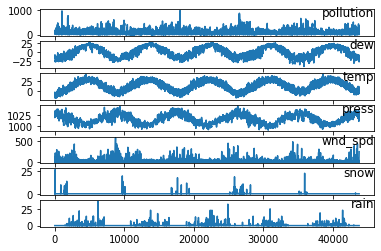

In [65]:
vals = data1.values
# specify columns to plot
group_list = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in group_list:
    plt.subplot(len(group_list), 1, i)
    plt.plot(vals[:, group])
    plt.title(data1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [66]:
def parsing_fn(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [68]:
data = pd.read_csv('./data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser= parsing_fn)

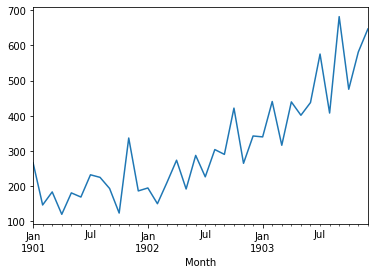

In [69]:
data.plot()
plt.show()

In [71]:
data = pd.read_csv('./data/daily-min-temperatures.csv',header = 0, index_col = 0, parse_dates = True, squeeze = True)

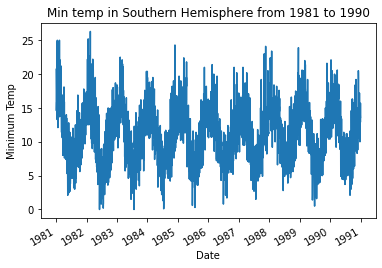

In [72]:
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere from 1981 to 1990')
plt.show()

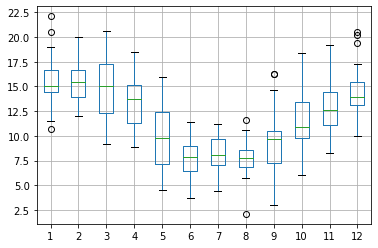

In [76]:
month_df = pd.DataFrame()
one_year_ser = data['1990']
grouped_df = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in grouped_df], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

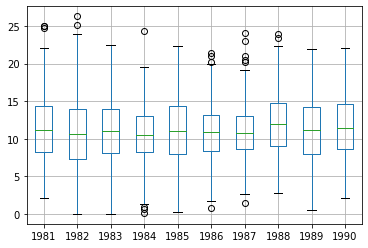

In [77]:
grouped_ser = data.groupby(pd.Grouper(freq='A'))
year_df = pd.DataFrame()
for name, group in grouped_ser:
    year_df[name.year] = group.values
year_df.boxplot()
plt.show()

In [78]:
tractor_sales_data = pd.read_csv("./data/tractor_salesSales.csv")
tractor_sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [81]:
date_ser = pd.date_range(start='2003-01-01', freq='MS',periods=len(tractor_sales_data))

In [84]:
tractor_sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
tractor_sales_data.set_index(date_ser, inplace=True)
tractor_sales_data = tractor_sales_data[['Tractor-Sales']]
tractor_sales_data.head(5)

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


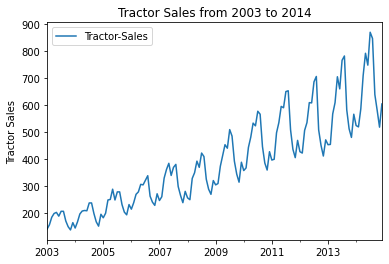

In [87]:
tractor_sales_data.plot()
plt.ylabel('Tractor Sales')
plt.title("Tractor Sales from 2003 to 2014")
plt.show()

C:\Users\vadi_\AppData\Local\Temp/ipykernel_13044/2424151980.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  one_year_ser = tractor_sales_data['2011']


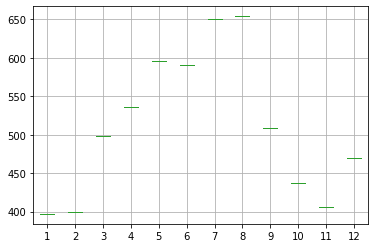

In [88]:
month_df = pd.DataFrame()
one_year_ser = tractor_sales_data['2011']
grouped_ser = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in
grouped_ser], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [90]:
turn_over_data = pd.read_csv('./data/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


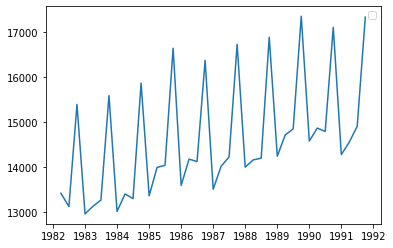

In [91]:
plt.plot(turn_over_data.TimeIndex, turn_over_data.Turnover)
plt.legend(loc='best')
plt.show()

C:\Users\vadi_\AppData\Local\Temp/ipykernel_13044/3433536775.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_turn_over = sm.tsa.seasonal_decompose(turn_over_data.Turnover, model="additive", freq=4)


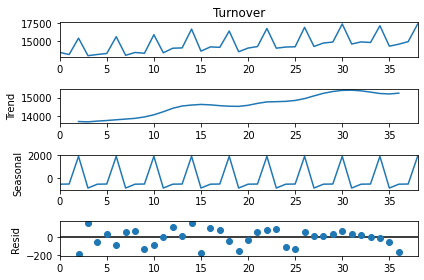

In [92]:
decomp_turn_over = sm.tsa.seasonal_decompose(turn_over_data.Turnover, model="additive", freq=4)
decomp_turn_over.plot()
plt.show()

In [93]:
trend = decomp_turn_over.trend
seasonal = decomp_turn_over.seasonal
residual = decomp_turn_over.resid

In [94]:
air_passengers_data = pd.read_csv('./data/AirPax.csv')

In [96]:
date_range = pd.date_range(start='1/1/1949', end='31/12/1960',freq='M')
air_passengers_data ['TimeIndex'] = pd.DataFrame(date_range,columns=['Month'])
print(air_passengers_data.head())

   Year Month  Passenger  TimeIndex
0  1949   Jan        112 1949-01-31
1  1949   Feb        118 1949-02-28
2  1949   Mar        132 1949-03-31
3  1949   Apr        129 1949-04-30
4  1949   May        121 1949-05-31


C:\Users\vadi_\AppData\Local\Temp/ipykernel_13044/1610360481.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_air_passengers_data = sm.tsa.seasonal_decompose(air_passengers_data.Passenger, model="multiplicative", freq=12)


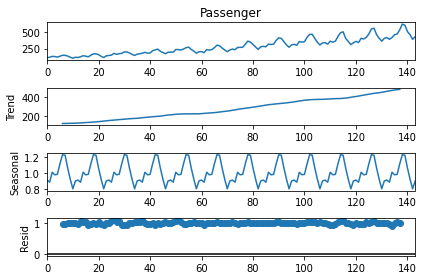

In [99]:
decomp_air_passengers_data = sm.tsa.seasonal_decompose(air_passengers_data.Passenger, model="multiplicative", freq=12)
decomp_air_passengers_data.plot()
plt.show()

In [100]:
Seasonal_comp = decomp_air_passengers_data.seasonal
Seasonal_comp.head(4)

0    0.910230
1    0.883625
2    1.007366
3    0.975906
Name: seasonal, dtype: float64

In [101]:
turn_over_data = pd.read_csv('./data/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

In [102]:
quarterly_turn_over_data = pd.pivot_table(turn_over_data,values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turn_over_data

Quarter,Q1,Q2,Q3,Q4
Year,,,,
1982,NaN,NaN,13423.2,13128.8
1983,15398.8,12964.2,13133.5,13271.7
1984,15596.3,13018.0,13409.3,13304.2
1985,15873.9,13366.5,13998.6,14045.1
1986,16650.3,13598.4,14183.2,14128.5
1987,16380.7,13512.8,14022.1,14231.8
1988,16737.0,14004.5,14165.5,14203.9
1989,16895.1,14248.2,14719.5,14855.8
1990,17361.6,14585.2,14873.5,14798.4


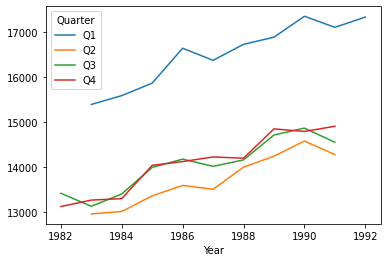

In [103]:
quarterly_turn_over_data.plot()
plt.show()

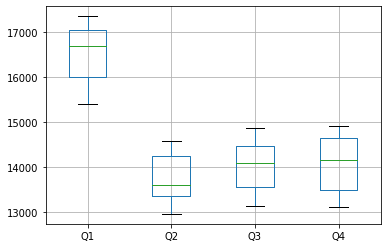

In [104]:
quarterly_turn_over_data.boxplot()
plt.show()